In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # For CART feature importance
import statsmodels.api as sm
from statsmodels.stats.stattools import  jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier  # For CART feature importance
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import SelectKBest, f_classif  # for classification tasks
# from sklearn.feature_selection import SelectKBest, f_reg  # for regression tasks (replace if applicable)
from sklearn.ensemble import ExtraTreesClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Perform label encoding
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/people/diplom.xlsx
/kaggle/input/data-load/child_cringe.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-load/child_cringe.csv')
df.drop(columns =['Unnamed: 0'], inplace = True)

In [3]:
# Select columns with data type 'object'
object_columns = df.select_dtypes(include=['object']).columns

# Print columns with data type 'object'
print("Columns with data type 'object':")
print(object_columns)

Columns with data type 'object':
Index([], dtype='object')


In [4]:
new_column_names = {
    'aRegion': 'Region',
    'avg_score': 'avg_mark',
    'aQ12_2': 'q12_2Participation in extra classes in last 3 years',
    'aQ12_4': "q12_4IHave sent your works to the competition",
    'aQ12_6': "q12_6Awards for art",
    'aQ13_1': "q13_1Self-studying of 1-2 subjects",
    'aQ13_3': "q13_3Professional courses",
    'aQ13_4_music': "q13_4Musical, art, dance school",
    'aQ13_6': "q13_6Interest club",
    'aQ': "dummy of extra-curricular activities",
    'aQ8_1': "q8_1Orchestra, chorus, ensemble",
    'aQ8_2': "q8_2School theatre",
    'aQ8_3': "q8_3School magazine or newspaper",
    'aQ8_4': "q8_4Foreign language, maths or other subj.society",
    'aQ8_5': "q8_5School olympiads on studied subjects",
    'aQ8_6': "q8_6Art society",
    'aQ8_7': "q8_7Sports sections",
    'aQ8_8': "q8_8Lectures and/or seminars",
    'aQ8_9': "q8_9Other",
    'aS8_1': "s8_1 Study desk for the child",
    'aS8_2': "s8_2 A separate room for the child",
    'aS8_3': "s8_3 A quite place for the child",
    'aS8_4': "s8_4 Computer your child can use for studying",
    'aS8_5': "s8_5 Educational software",
    'aS8_6': "s8_6 Access to the Internet",
    'aS8_7': "s8_7 Classical literature",
    'aS8_8': "s8_8 Poetry",
    'aS8_9': "s8_9 Books that help your child's studies",
    'aS8_10': "s8_10 Works of art",
    'aS8_11': "s8_11 Dictionaries",
    'aS8_12': "s8_12 A dishwasher",
    'aS8_13': "s8_13 A DVD-player",
    'aS8_14': "s8_14 A digital camera",
    'aS8_15': "s8_15 Home cinema",
    'aS8_16': "s8_16 Satellite television",
    'aS9_1': "s9_1Number of cell phones at home",
    'aS9_2': "s9_2Number of TV sets",
    'aS9_3': "s9_3Number of computers",
    'aS9_4': "s9_4Number of cars",
    'aS9_5': "s9_5Number of bathrooms",
    'aS10': "s10Number of books at home",
    'aS11_avg ': "average frequency of controlling homework",
    'aS12_2': "s12_2Parent visits all PTA meetings",
    'aS12_3': "s12_3Parent calls teachers to know grades",
    'aS12_4': "s12_4Parent comes to school to discuss progress",
    'aS13_1': "Parent helps with homework",
    'aS13_2': "s13_2 Parent hires tutors",
    'aS13_3': "s13_3 Parent gives additional inf./literature",
    'aS13_4': "s13_4 Parent ask friends to help child with studies",
    'aS13_5': "s13_5Parent visits add.classes with child",
    'aQ16': "q16Hours per week parents help with homework",
    'aQ7_1' : "q7_1 Particular specialization of the school", 
    'aQ7_4' : "q7_4Students - winners of int.sch. olimpiads", 
    'aQ8' : 'sum of activities proposed by a school', 
    'aQ9' : "Friends` intentions after the 9 grade"
}


In [5]:
df = df.rename(columns=new_column_names)
df


,Region,SPB,Mos_region,Moscow,gender,algebra,geometry,russian,literature,history,...,q8_2School theatre,q8_3School magazine or newspaper,"q8_4Foreign language, maths or other subj.society",q8_5School olympiads on studied subjects,q8_6Art society,q8_7Sports sections,q8_9Other,sum of activities proposed by a school,Friends` intentions after the 9 grade,Salary
0,0.016053,0,0,0,0,5,4,4,4,4,...,0,0,1,1,0,1,1,5,1.0,14000
1,0.016053,0,0,0,0,3,3,3,3,3,...,0,0,1,1,0,1,1,5,1.0,14000
2,0.016053,0,0,0,1,3,3,3,3,3,...,0,0,1,1,0,1,1,5,2.0,35000
3,0.016053,0,0,0,1,3,3,3,3,3,...,0,0,1,1,0,1,1,5,1.0,46000
4,0.016053,0,0,0,1,3,3,3,4,4,...,1,0,1,1,0,1,1,4,3.0,32800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.012276,0,0,0,1,3,3,3,3,3,...,0,0,1,1,1,1,1,5,3.0,40000
1055,0.012276,0,0,0,1,4,3,3,4,4,...,0,0,0,1,0,0,0,1,3.0,30000
1056,0.012276,0,0,0,0,4,4,4,5,4,...,1,0,1,0,0,0,1,2,3.0,27000
1057,0.012276,0,0,0,1,4,4,4,4,3,...,0,0,1,1,1,0,1,5,3.0,27000


# Preprocessing 

In [6]:
nan_columns = []
# Iterate over each column in the DataFrame
for column in df.columns:
    # Calculate the percentage of NaN values in the column
    nan_percentage = df[column].isnull().mean() * 100
    if nan_percentage > 0:
        nan_columns.append((column, nan_percentage))

print("Columns with NaN values (empty cells) and their percentages:")
for column, percentage in nan_columns:
    print(f"{column}: {percentage:.2f}%")

Columns with NaN values (empty cells) and their percentages:


In [7]:
# Define a function to impute missing values with the most frequent value
def impute_missing_values(df):
    for col in df.columns:
        # Exclude columns with non-numeric data
        if pd.api.types.is_numeric_dtype(df[col]):
          # Find the most frequent value
          most_frequent_value = df[col].mode().iloc[0]
          # Replace missing values with the most frequent value
          df.loc[df[col].isnull(), col] = most_frequent_value
    return df

# Impute missing values
df = impute_missing_values(df.copy())
df

,Region,SPB,Mos_region,Moscow,gender,algebra,geometry,russian,literature,history,...,q8_2School theatre,q8_3School magazine or newspaper,"q8_4Foreign language, maths or other subj.society",q8_5School olympiads on studied subjects,q8_6Art society,q8_7Sports sections,q8_9Other,sum of activities proposed by a school,Friends` intentions after the 9 grade,Salary
0,0.016053,0,0,0,0,5,4,4,4,4,...,0,0,1,1,0,1,1,5,1.0,14000
1,0.016053,0,0,0,0,3,3,3,3,3,...,0,0,1,1,0,1,1,5,1.0,14000
2,0.016053,0,0,0,1,3,3,3,3,3,...,0,0,1,1,0,1,1,5,2.0,35000
3,0.016053,0,0,0,1,3,3,3,3,3,...,0,0,1,1,0,1,1,5,1.0,46000
4,0.016053,0,0,0,1,3,3,3,4,4,...,1,0,1,1,0,1,1,4,3.0,32800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.012276,0,0,0,1,3,3,3,3,3,...,0,0,1,1,1,1,1,5,3.0,40000
1055,0.012276,0,0,0,1,4,3,3,4,4,...,0,0,0,1,0,0,0,1,3.0,30000
1056,0.012276,0,0,0,0,4,4,4,5,4,...,1,0,1,0,0,0,1,2,3.0,27000
1057,0.012276,0,0,0,1,4,4,4,4,3,...,0,0,1,1,1,0,1,5,3.0,27000


In [8]:
# Z-score method to detect outliers
from scipy.stats import zscore

# Calculate Z-scores for each column
#z_scores = abs(zscore(imputed_df))

# Define threshold for outlier detection
#threshold = 3

# Find outliers using Z-scores
#outliers_zscore = (z_scores > threshold).any(axis=0)

# Interquartile Range (IQR) method to detect outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
#Q1 = imputed_df.quantile(0.25)
#Q3 = imputed_df.quantile(0.75)

# Calculate IQR
#IQR = Q3 - Q1

# Define threshold for outlier detection
#threshold_iqr = 1.5

# Find outliers using IQR
#outliers_iqr = ((imputed_df < (Q1 - threshold_iqr * IQR)) | (imputed_df > (Q3 + threshold_iqr * IQR))).any()

# Output columns with outliers detected using each method
#print("Columns with outliers detected using Z-score method:")
#print(imputed_df.columns[outliers_zscore])
#print("\nColumns with outliers detected using IQR method:")
#print(imputed_df.columns[outliers_iqr])

In [9]:
# Method 2: Direct Update
def impute_outliers_with_median_direct(df):
    for col in df.columns:
        # Exclude columns with non-numeric data
        if pd.api.types.is_numeric_dtype(df[col]):
            # Find IQR (Interquartile Range)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Find outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            # Replace outliers with median
            median_value = df[col].median()
            df.loc[outliers.index, col] = median_value  # Update column values directly
    return df

#imputed_df = impute_outliers_with_median_direct(df.copy())  #

# Impute missing values
#imputed_df = impute_missing_values(imputed_df)

In [10]:
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random_state for reproducibility

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Feature selection with correlation analysis for classification (f_classif)
# Use f_reg for regression tasks (replace if applicable)
selector = SelectKBest(f_classif, k=10)  # Select top 2 features based on correlation with target
X_selected = selector.fit_transform(X, y)

# Print selected features (assuming feature names are in X.columns)
print("Selected features by correlation:", X.columns[selector.get_support(indices=True)].tolist())

# Train your model using X_selected (reduced features) and y


Selected features by correlation: ['Region', 'Moscow', "father's education", 'income of a family', 's9_4Number of cars', 's10Number of books at home', 'education', 'experience_months', 'woman_pozhe_goda_nach_spec', 'q8_1Orchestra, chorus, ensemble']


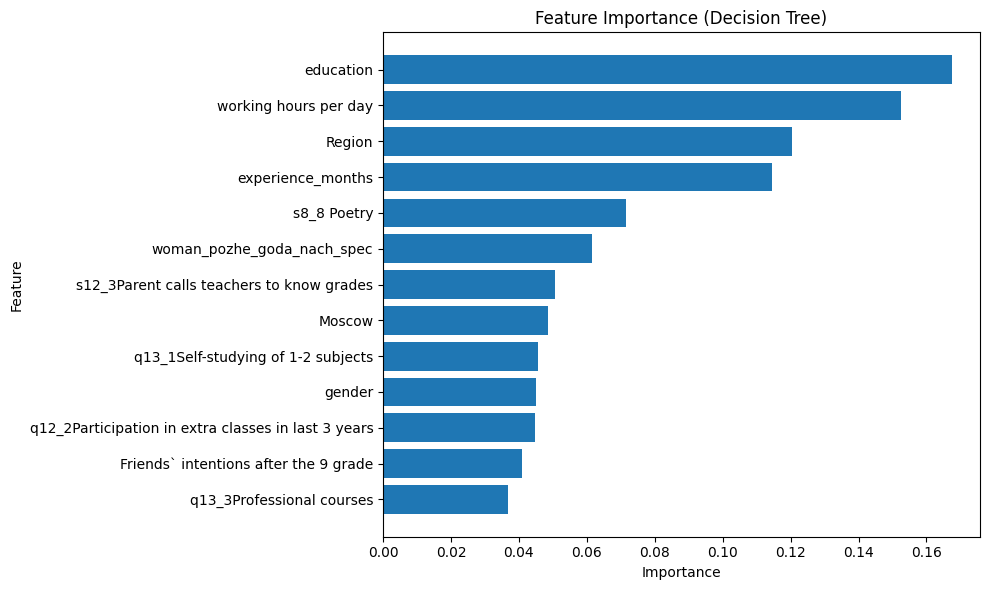

In [12]:
# Define the Decision Tree model (adjust parameters as needed)
model = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Feature Importance Analysis
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance (descending order)
feature_importance_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Select top 13 features (adjust as needed)
top_features = feature_importance_sorted[:13]
feature_names = [name for name, _ in top_features]
importance_values = [importance for _, importance in top_features]

# Create a bar chart for feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()  # Arrange features with highest importance on top
plt.tight_layout()
plt.show()

In [13]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Create a bar chart with plotly express
fig = px.bar(importance_df, x='feature', y='importance', title='Feature Importance (ExtraTreesClassifier)', color='importance')
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance', coloraxis_showscale=False)  # Hide color axis scale
fig.show()

In [14]:
# Assuming your DataFrame is named 'df' and has a column named 'Salary' as the target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# 1. CART (Decision Tree) Feature Importance
model_cart = DecisionTreeClassifier(random_state=42)
model_cart.fit(X_train, y_train)
feature_importances_cart = model_cart.feature_importances_

# Create DataFrames for Feature Importances
df_cart = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_cart})

# Plot for CART
fig_cart = px.bar(df_cart, x='feature', y='importance', title='CART Feature Importance')
fig_cart.update_xaxes(title_text='Features')
fig_cart.update_yaxes(title_text='Importance')
fig_cart.show()

In [16]:
# 2. Random Forest Feature Importance
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
feature_importances_rf = model_rf.feature_importances_
df_rf = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_rf})
# Plot for Random Forest
fig_rf = px.bar(df_rf, x='feature', y='importance', title='Random Forest Feature Importance')
fig_rf.update_xaxes(title_text='Features')
fig_rf.update_yaxes(title_text='Importance')
fig_rf.show()

In [17]:
# 1. CART (Decision Tree) Feature Importance
model_cart = DecisionTreeClassifier(random_state=42)
model_cart.fit(X_train, y_train)
feature_importances_cart = model_cart.feature_importances_

# Create DataFrames for Feature Importances
df_cart = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_cart})

# Plot for CART
fig_cart = px.bar(df_cart, x='feature', y='importance', title='CART Feature Importance')
fig_cart.update_xaxes(title_text='Features')
fig_cart.update_yaxes(title_text='Importance')
fig_cart.show()

# Select Top 20 Most Important Variables
top_20_features = df_cart.sort_values('importance', ascending=False).head(20)['feature'].to_list()

# Heatmap Construction (Assuming your data has a meaningful structure for heatmaps)
heatmap_data_cart = X_train[top_20_features]  # Replace with appropriate data for each model
heatmap_data_rf = X_train[top_20_features]  # Replace with appropriate data for each model

In [18]:
# Feature Names
feature_names = X.columns

# Sort Feature Importances in Descending Order
df_cart_sorted = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_cart})
df_cart_sorted = df_cart_sorted.sort_values(by='importance', ascending=False)
df_rf_sorted = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_rf})
df_rf_sorted = df_rf_sorted.sort_values(by='importance', ascending=False)


# Select Top 15 Most Important Variables
c= df_cart_sorted.head(20)['feature'].to_list()  # Adjust for other models (df_rf_sorted, df_xgb_sorted)

# Heatmap Construction (Assuming your data has a meaningful structure for heatmaps)
heatmap_data_cart = X_train[top_20_features]  # Replace with appropriate data for each model
heatmap_data_rf = X_train[top_20_features]  # Replace with appropriate data for each model

# Assuming you have a correlation matrix or other data suitable for heatmaps
corr_matrix = heatmap_data_cart.corr()  # Replace with your heatmap data for CART
# (Similar replacements needed for RF and XGBoost heatmaps)
# Select Top 15 Most Important Variables
top_15_features = df_cart_sorted.head(20)['feature'].to_list()

# Heatmap Construction (Assuming your data is a correlation matrix)
corr_matrix = X_train[top_20_features].corr()  # Adjust for other models (df_rf_sorted, df_xgb_sorted)


<Axes: >

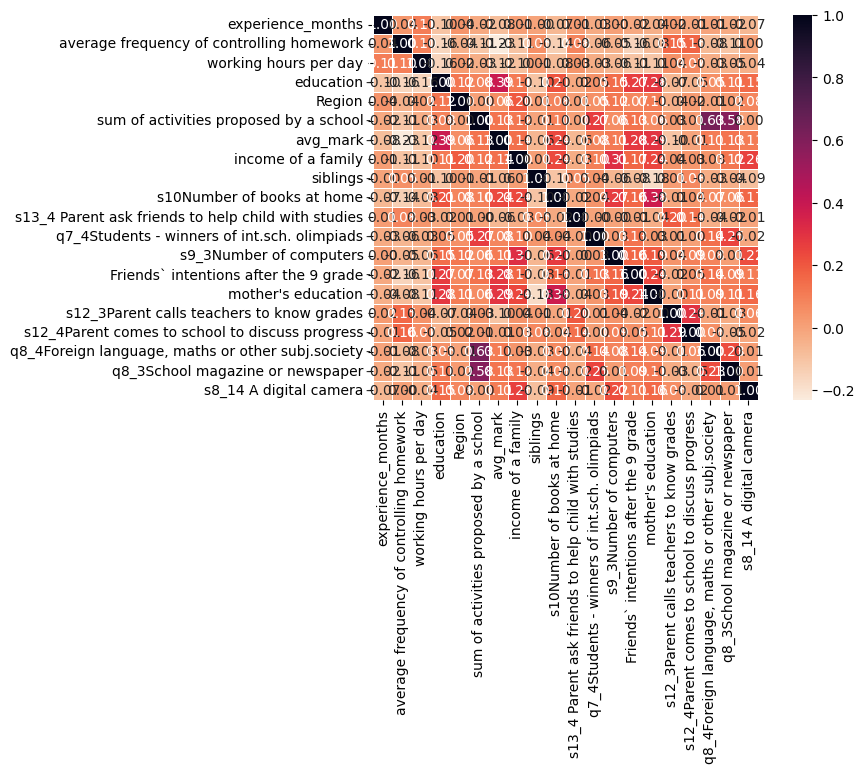

In [19]:
plt.figure(figsize=(9, 5))
# Random Forest Feaure Importance Heatmap
sns.heatmap(heatmap_data_cart.corr(), annot = True, cmap='rocket_r', linewidths=0.5, fmt='.2f', square=True)

<Axes: >

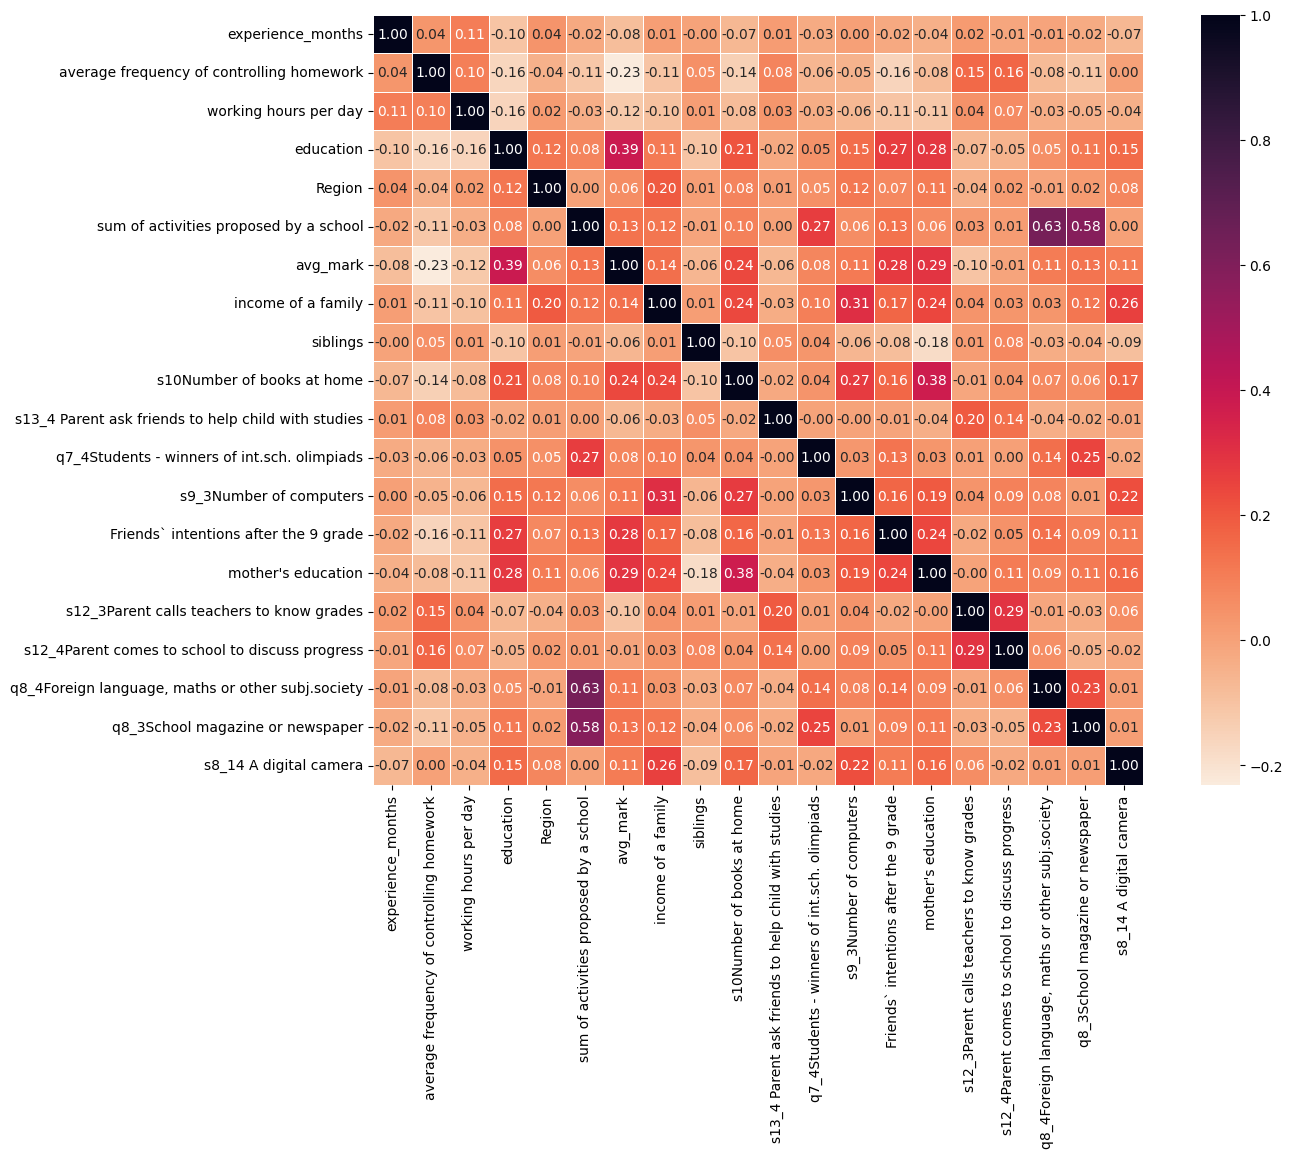

In [20]:
plt.figure(figsize=(15, 10))
# Random Forest Feaure Importance Heatmap
sns.heatmap(heatmap_data_rf.corr(), annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f', square=True)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

# Print the coefficients
print("Lasso Coefficients:")
for feature, coefficient in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coefficient:.2f}")

Lasso Coefficients:
Region: 774.54
SPB: 652.29
Mos_region: 4093.50
Moscow: 3866.58
gender: -871.35
algebra: -1342.75
geometry: 4893.94
russian: 3298.06
literature: -1245.65
history: -3089.65
physics: 1609.82
chemistry: -2140.39
biology: 1711.82
avg_mark: -347.29
q12_2Participation in extra classes in last 3 years: -2958.39
q12_4IHave sent your works to the competition: 2469.69
q12_6Awards for art: -517.23
q13_1Self-studying of 1-2 subjects: -39.06
q13_3Professional courses: 3213.58
q13_4Musical, art, dance school: -1206.65
q13_6Interest club: -1654.71
dummy of extra-curricular activities: 120.06
siblings: 2406.20
mother's education: 379.29
father's education: -662.18
income of a family: 2087.97
s8_1 Study desk for the child: -347.77
s8_2 A separate room for the child: -912.89
s8_3 A quite place for the child: 154.55
s8_4 Computer your child can use for studying: -262.95
s8_5 Educational software: 255.72
s8_6 Access to the Internet: -337.79
s8_7 Classical literature: 272.73
s8_8 Poetry:

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.813e+11, tolerance: 2.905e+08



In [22]:
top_20_features 

['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 's13_4 Parent ask friends to help child with studies',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 's12_3Parent calls teachers to know grades',
 's12_4Parent comes to school to discuss progress',
 'q8_4Foreign language, maths or other subj.society',
 'q8_3School magazine or newspaper',
 's8_14 A digital camera']

# Regression 

In [23]:
# Define target and feature variables
target_variable = 'Salary'
feature_variables = ['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 's13_4 Parent ask friends to help child with studies',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 's12_3Parent calls teachers to know grades',
 's12_4Parent comes to school to discuss progress',
 'q8_4Foreign language, maths or other subj.society',
 'q8_3School magazine or newspaper',
 's8_14 A digital camera']

# Add a constant term
X = sm.add_constant(df[feature_variables])
model = sm.OLS(df[target_variable], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.937
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.65e-05
Time:                        23:03:55   Log-Likelihood:                -13039.
No. Observations:                1059   AIC:                         2.612e+04
Df Residuals:                    1038   BIC:                         2.622e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                 866.9143   1.63e+04      0.053      0.958   -3.11e+04    3.28e+04
experience_months                                      73.7588     80.963      0.911      0.362     -85.111     232.629
average frequency of controlling homework            -169.2163   2147.859     -0.079      0.937   -4383.857    4045.424
working hours per day                                -435.8863    447.694     -0.974      0.330   -1314.375     442.603
education                                            2668.0086   1428.722      1.867      0.062    -135.503    5471.520
Region                                               2.217e+05   1.39e+05      1.598      0.110   -5.05e+04    4.94e+05
sum of activities proposed by a school              -1127.9501   1594.474     -0.707      0.479   -4256.710    2000.810
avg_mark                                             2253.3810   3234.341      0.697      0.486   -4093.212    8599.974
income of a family                                   5807.1731   1665.986      3.486      0.001    2538.088    9076.258
siblings                                             3127.2412   1738.940      1.798      0.072    -284.997    6539.480
s10Number of books at home                             47.2478   1439.207      0.033      0.974   -2776.838    2871.334
s13_4 Parent ask friends to help child with studies  2330.1150   3625.813      0.643      0.521   -4784.645    9444.875
q7_4Students - winners of int.sch. olimpiads         2433.9697   3533.974      0.689      0.491   -4500.577    9368.517
s9_3Number of computers                              1797.4883   2750.546      0.654      0.514   -3599.776    7194.753
Friends` intentions after the 9 grade                1579.8932   2553.504      0.619      0.536   -3430.725    6590.512
mother's education                                   1413.2861   1180.236      1.197      0.231    -902.635    3729.207
s12_3Parent calls teachers to know grades           -5900.4545   3774.747     -1.563      0.118   -1.33e+04    1506.551
s12_4Parent comes to school to discuss progress      2653.5776   3710.053      0.715      0.475   -4626.481    9933.636
q8_4Foreign language, maths or other subj.society    1942.4137   4522.571      0.429      0.668   -6932.011    1.08e+04
q8_3School magazine or newspaper                     4151.6579   4360.107      0.952      0.341   -4403.970    1.27e+04
s8_14 A digital camera                               1379.4035   4155.801      0.332      0.740   -6775.326    9534.133
==============================================================================
Omnibus:                     1581.171   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarqu

In [24]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 20.93810355659243),
 ('p-value', 0.4007838279436176),
 ('f-value', 1.0468427540884988),
 ('f p-value', 0.4025882966663297)]

In [25]:
data_fit = df[feature_variables]
target_variable = 'Salary'

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

# Define target and feature variables
target_variable = 'Salary'
feature_variables = ['experience_months',
                     'average frequency of controlling homework',
                     'working hours per day',
                     'education',
                     'Region',
                     'sum of activities proposed by a school',
                     'avg_mark',
                     'income of a family',
                     'siblings',
                     's10Number of books at home',
                     's13_4 Parent ask friends to help child with studies',
                     'q7_4Students - winners of int.sch. olimpiads',
                     's9_3Number of computers',
                     'Friends` intentions after the 9 grade',
                     "mother's education",
                     's12_3Parent calls teachers to know grades',
                     's12_4Parent comes to school to discuss progress',
                     'q8_4Foreign language, maths or other subj.society',
                     'q8_3School magazine or newspaper',
                     's8_14 A digital camera']

X = df[feature_variables]
y = df[target_variable]

# Create a linear regression model
model = LinearRegression()

# Create the RFE object and compute a cross-validated score
rfe = RFE(model, n_features_to_select=None, step=1, verbose=0)
rfe.fit(X, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': feature_variables, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values('Ranking')

# Select the top-ranked features
best_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()

# Fit the linear regression model with the best features
X_best = X[best_features]
model.fit(X_best, y)

# Calculate the R-squared score
r2 = model.score(X_best, y)

# Print the best features and the highest R-squared score
print(f"Best features: {best_features}")
print(f"Highest R-squared score: {r2}")

Best features: ['siblings', 's12_3Parent calls teachers to know grades', 'education', 'Region', 'Friends` intentions after the 9 grade', 'avg_mark', 'income of a family', 's12_4Parent comes to school to discuss progress', 'q8_3School magazine or newspaper', 's9_3Number of computers']
Highest R-squared score: 0.04922768680365286


In [27]:
X = df[feature_variables]
y = df[target_variable]

# Create a linear regression model
model = LinearRegression()

# Create the RFE object and compute a cross-validated score
rfe = RFE(model, n_features_to_select=None, step=1, verbose=1)
rfe.fit(X, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': feature_variables, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values('Ranking')

# Print the feature rankings
feature_ranking

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


,Feature,Ranking
8,siblings,1
15,s12_3Parent calls teachers to know grades,1
3,education,1
4,Region,1
13,Friends` intentions after the 9 grade,1
6,avg_mark,1
7,income of a family,1
16,s12_4Parent comes to school to discuss progress,1
18,q8_3School magazine or newspaper,1
12,s9_3Number of computers,1


In [28]:
# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': feature_variables, 'Ranking': ranking[:len(feature_variables)]})
feature_ranking = feature_ranking.sort_values('Ranking')

# Print the feature ranking table
print("Feature Ranking Table:")
print(feature_ranking)

Feature Ranking Table:
                                              Feature  Ranking
8                                            siblings        1
15          s12_3Parent calls teachers to know grades        1
3                                           education        1
4                                              Region        1
13              Friends` intentions after the 9 grade        1
6                                            avg_mark        1
7                                  income of a family        1
16    s12_4Parent comes to school to discuss progress        1
18                   q8_3School magazine or newspaper        1
12                            s9_3Number of computers        1
10  s13_4 Parent ask friends to help child with st...        2
11       q7_4Students - winners of int.sch. olimpiads        3
14                                 mother's education        4
17  q8_4Foreign language, maths or other subj.society        5
5              sum of activities

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

X = df[feature_variables]
y = df[target_variable]

# Perform feature engineering using polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination (RFE)
rfe = RFE(model, n_features_to_select=None, step=1, verbose=1)
rfe.fit(X_poly, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': [feature_variables[i] for i in range(min(len(feature_variables), len(ranking)))], 'Ranking': ranking[:min(len(feature_variables), len(ranking))]})
feature_ranking = feature_ranking.sort_values('Ranking')

# Print the feature ranking table
print("Feature Ranking Table:")
feature_ranking

Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
F

,Feature,Ranking
9,s10Number of books at home,1
17,"q8_4Foreign language, maths or other subj.society",1
16,s12_4Parent comes to school to discuss progress,1
15,s12_3Parent calls teachers to know grades,1
14,mother's education,1
13,Friends` intentions after the 9 grade,1
12,s9_3Number of computers,1
11,q7_4Students - winners of int.sch. olimpiads,1
10,s13_4 Parent ask friends to help child with st...,1
19,s8_14 A digital camera,1


In [30]:
X_selected

array([[1.60528801e-02, 0.00000000e+00, 2.00000000e+00, ...,
        6.00000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.60528801e-02, 0.00000000e+00, 3.00000000e+00, ...,
        3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60528801e-02, 0.00000000e+00, 3.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22757318e-02, 0.00000000e+00, 4.00000000e+00, ...,
        1.30000000e+01, 0.00000000e+00, 1.00000000e+00],
       [1.22757318e-02, 0.00000000e+00, 6.00000000e+00, ...,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00],
       [1.22757318e-02, 0.00000000e+00, 3.00000000e+00, ...,
        1.50000000e+01, 0.00000000e+00, 0.00000000e+00]])

In [31]:
# Define target and feature variables
target_variable = 'Salary'
endogenous_variable = 'avg_mark'
exogenous_variables = ['experience_months',
                      'working hours per day',
                      'education',
                      'income of a family',
                      'siblings',
                      's10Number of books at home']

# Instrumental variables (e.g., 'q7_4Students - winners of int.sch. olimpiads')
iv_variables = ['q7_4Students - winners of int.sch. olimpiads']

# Fit the supplementary model for the endogenous variable
supplementary_model = LinearRegression()
supplementary_model.fit(df[iv_variables], df[endogenous_variable])
endogenous_predicted = supplementary_model.predict(df[iv_variables])

# Fit the main model using the predicted endogenous variable
main_model = LinearRegression()
main_model.fit(np.column_stack((df[exogenous_variables], endogenous_predicted)), df[target_variable])

# Calculate the R-squared score
r2 = main_model.score(np.column_stack((df[exogenous_variables], endogenous_predicted)), df[target_variable])
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.0431


In [32]:
# Define target and feature variables
target_variable = 'Salary'
feature_variables = ['experience_months',
                     'average frequency of controlling homework',
                     'working hours per day',
                     'education',
                     'Region',
                     'sum of activities proposed by a school',
                     'avg_mark',
                     'income of a family',
                     'siblings',
                     's10Number of books at home',
                     's13_4 Parent ask friends to help child with studies',
                     'q7_4Students - winners of int.sch. olimpiads',
                     's9_3Number of computers',
                     'Friends` intentions after the 9 grade',
                     "mother's education",
                     's12_3Parent calls teachers to know grades',
                     's12_4Parent comes to school to discuss progress',
                     'q8_4Foreign language, maths or other subj.society',
                     'q8_3School magazine or newspaper',
                     's8_14 A digital camera']

X = df[feature_variables]
y = df[target_variable]

# Perform feature engineering using polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination (RFE)
rfe = RFE(model, n_features_to_select=None, step=1, verbose=1)
rfe.fit(X_poly, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': [feature_variables[i] for i in range(min(len(feature_variables), len(ranking)))], 'Ranking': ranking[:min(len(feature_variables), len(ranking))]})
feature_ranking = feature_ranking.sort_values('Ranking')

# Print the feature ranking table
print("Feature Ranking Table:")
print(feature_ranking)

# Calculate R-squared score
X_selected = X_poly[:, rfe.support_]
model.fit(X_selected, y)
r2 = model.score(X_selected, y)

print(f"R-squared score: {r2:.4f}")



Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
F

In [33]:
# Define target and feature variables
target_variable = 'Salary'
feature_variables = ['experience_months',
                     'average frequency of controlling homework',
                     'working hours per day',
                     'education',
                     'Region',
                     'sum of activities proposed by a school',
                     'avg_mark',
                     'income of a family',
                     'siblings',
                     's10Number of books at home',
                     's13_4 Parent ask friends to help child with studies',
                     'q7_4Students - winners of int.sch. olimpiads',
                     's9_3Number of computers',
                     'Friends` intentions after the 9 grade',
                     "mother's education",
                     's12_3Parent calls teachers to know grades',
                     's12_4Parent comes to school to discuss progress',
                     'q8_4Foreign language, maths or other subj.society',
                     'q8_3School magazine or newspaper',
                     's8_14 A digital camera']

# Take the logarithm of the target variable
df['log_salary'] = np.log(df[target_variable])

X = df[feature_variables]
y = df['log_salary']

# Perform feature engineering using polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination (RFE)
rfe = RFE(model, n_features_to_select=None, step=1, verbose=1)
rfe.fit(X_poly, y)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to store the feature rankings
feature_ranking = pd.DataFrame({'Feature': [feature_variables[i] for i in range(min(len(feature_variables), len(ranking)))], 'Ranking': ranking[:min(len(feature_variables), len(ranking))]})
feature_ranking = feature_ranking.sort_values('Ranking')

# Print the feature ranking table
print("Feature Ranking Table:")
print(feature_ranking)

# Calculate R-squared score
X_selected = X_poly[:, rfe.support_]
model.fit(X_selected, y)
r2 = model.score(X_selected, y)

print(f"R-squared score: {r2:.4f}")


Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
F

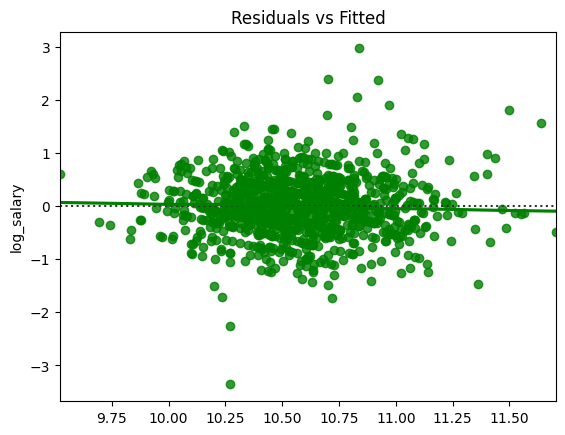

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



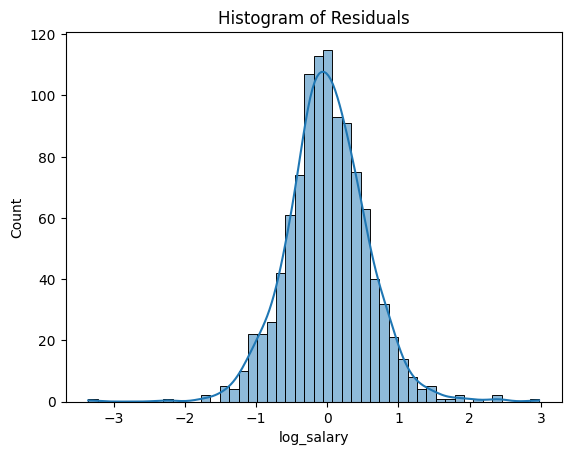

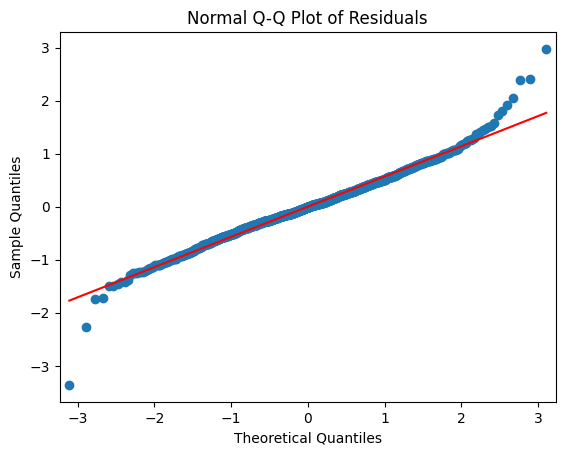

Breusch-Pagan p-value: 0.9756
White's test p-value: nan
Durbin-Watson statistic: 1.7181


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



        Features         VIF
0      feature_0  749.052644
1      feature_1  619.734068
2      feature_2  350.307420
3      feature_3  173.640143
4      feature_4         inf
..           ...         ...
109  feature_109   95.958013
110  feature_110   18.356661
111  feature_111         inf
112  feature_112   13.163123
113  feature_113         inf

[114 rows x 2 columns]


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your data in a DataFrame 'df' and the target variable 'y'
# and the selected features 'X_selected'

# Fit the linear regression model
model = LinearRegression()
model.fit(X_selected, y)

# Calculate residuals
y_pred = model.predict(X_selected)
residuals = y - y_pred

# Linearity assumption
# Plotting residuals vs. fitted values
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residuals vs Fitted')
plt.show()

# Normality assumption
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ-plot of residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()
# Add a constant column to X_selected
X_selected = sm.add_constant(X_selected)

# Perform the Breusch-Pagan test
lm_resid, lm_fit, lm_stats, bp_pval = het_breuschpagan(residuals, X_selected)
print(f"Breusch-Pagan p-value: {bp_pval:.4f}")

# White's test for heteroscedasticity
white_resid, white_fit, white_stats, white_pval = het_white(residuals, X_selected)
print(f"White's test p-value: {white_pval:.4f}")

# Independence of errors assumption
# Durbin-Watson test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.4f}")

# Multicollinearity assumption
# Variance Inflation Factors (VIFs)
X_poly_selected = X_poly[:, rfe.support_]
X_selected_df = pd.DataFrame(X_poly_selected, columns=['const'] + [f'feature_{i}' for i in range(X_poly_selected.shape[1] - 1)])
vif = pd.DataFrame()
vif['Features'] = X_selected_df.columns[1:]  # Exclude the constant column
vif['VIF'] = [variance_inflation_factor(X_selected_df.values[:, 1:], i) for i in range(X_selected_df.shape[1] - 1)]
print(vif)